In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import sklearn
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

In [ ]:
seed = 0

#White Wine

In [ ]:
# Data preparation
data = pd.read_csv("winequality-white-copy.csv")
print(data.shape)
data.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


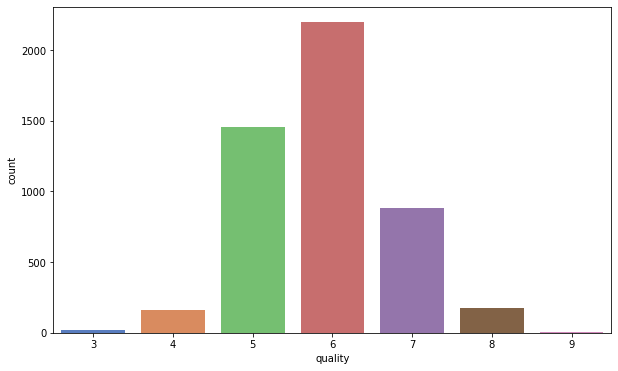

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data["quality"], palette="muted")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


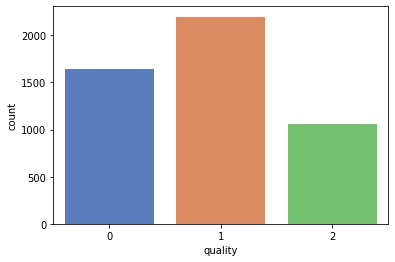

In [ ]:
for i in range(len(data)):
    num = data['quality'][i]
    data['quality'][i] = 0 if num <= 5 else (2 if num > 6 else 1)

sns.countplot(data["quality"], palette="muted")

In [ ]:
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# from sklearn.preprocessing import LabelEncoder
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       355
           1       0.52      0.71      0.60       409
           2       0.65      0.36      0.46       216

    accuracy                           0.59       980
   macro avg       0.63      0.56      0.57       980
weighted avg       0.62      0.59      0.59       980



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=[100], 
    random_state=seed,
    activation='relu',
    max_iter=10000,
    verbose=True,
    early_stopping=True,
    n_iter_no_change=100
)
mlp.fit(X,y)
pred_mlp = mlp.predict(X_test)

print(classification_report(y_test, pred_mlp))

Iteration 1, loss = 8.23007509
Validation score: 0.316327
Iteration 2, loss = 2.08367431
Validation score: 0.426531
Iteration 3, loss = 1.42330231
Validation score: 0.497959
Iteration 4, loss = 1.10578475
Validation score: 0.418367
Iteration 5, loss = 1.05592677
Validation score: 0.518367
Iteration 6, loss = 1.01160575
Validation score: 0.508163
Iteration 7, loss = 1.01297351
Validation score: 0.504082
Iteration 8, loss = 0.98848784
Validation score: 0.506122
Iteration 9, loss = 0.98843856
Validation score: 0.536735
Iteration 10, loss = 0.98197705
Validation score: 0.495918
Iteration 11, loss = 0.97242723
Validation score: 0.520408
Iteration 12, loss = 0.96343693
Validation score: 0.495918
Iteration 13, loss = 0.99252815
Validation score: 0.512245
Iteration 14, loss = 0.95968999
Validation score: 0.514286
Iteration 15, loss = 0.96891549
Validation score: 0.475510
Iteration 16, loss = 0.95601636
Validation score: 0.524490
Iteration 17, loss = 0.95610319
Validation score: 0.510204
Iterat

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       355
           1       0.64      0.78      0.70       409
           2       0.75      0.62      0.68       216

    accuracy                           0.71       980
   macro avg       0.73      0.69      0.70       980
weighted avg       0.72      0.71      0.71       980



In [ ]:
#Finding best parameters for our SVC model
from sklearn.model_selection import GridSearchCV
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10, verbose=3, return_train_score=True)

grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV 1/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.549, test=0.541) total time=   0.6s
[CV 2/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.543, test=0.574) total time=   0.6s
[CV 3/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.547, test=0.559) total time=   0.6s
[CV 4/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.549, test=0.548) total time=   0.5s
[CV 5/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.553, test=0.528) total time=   0.5s
[CV 6/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.548, test=0.551) total time=   0.5s
[CV 7/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.578, test=0.546) total time=   0.5s
[CV 8/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.549, test=0.548) total time=   0.6s
[CV 9/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.554, test=0.535) total time=   0.5s
[CV 10/10] END C=0.1, gamma=0.1, kernel=line

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
print(grid_svc.best_params_)
print(classification_report(y_test, grid_svc.predict(X_test)))

{'C': 1.4, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       355
           1       0.58      0.82      0.68       409
           2       0.77      0.54      0.64       216

    accuracy                           0.67       980
   macro avg       0.72      0.65      0.66       980
weighted avg       0.71      0.67      0.67       980



In [ ]:
“An Information View on Data Science”#Finding best parameters for our MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=[100], 
    random_state=seed,
    batch_size=len(X_train),
    activation='relu',
    max_iter=1000,
    verbose=False,
    early_stopping=True,
    n_iter_no_change=50
)
param = {
    'hidden_layer_sizes': [[x] for x in (50, 100, 200, 300, 400, 500)] + [[x, x] for x in (50, 100, 200, 300, 400, 500)],
    'activation': ['logistic', 'relu', 'tanh']
}
grid_mlp = GridSearchCV(mlp, param_grid=param, scoring='accuracy', cv=10, verbose=3, return_train_score=True)
grid_mlp.fit(X_train, y_train)

print(grid_mlp.best_params_)
print(classification_report(y_test, grid_mlp.predict(X_test)))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END ..activation=logistic, hidden_layer_sizes=[50]; total time=   9.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END ..activation=logistic, hidden_layer_sizes=[50]; total time=   4.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END ..activation=logistic, hidden_layer_sizes=[50]; total time=   6.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END ..activation=logistic, hidden_layer_sizes=[50]; total time=   4.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END ..activation=logistic, hidden_layer_sizes=[50]; total time=   5.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END ..activation=logistic, hidden_layer_sizes=[50]; total time=   2.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END ..activation=logistic, hidden_layer_sizes=[50]; total time=   7.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END ..activation=logistic, hidden_layer_sizes=[50]; total time=   5.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END ..activation=logistic, hidden_layer_sizes=[50]; total time=   5.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END .activation=logistic, hidden_layer_sizes=[50]; total time=   6.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .activation=logistic, hidden_layer_sizes=[100]; total time=   1.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .activation=logistic, hidden_layer_sizes=[100]; total time=   4.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .activation=logistic, hidden_layer_sizes=[100]; total time=   5.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .activation=logistic, hidden_layer_sizes=[100]; total time=   6.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .activation=logistic, hidden_layer_sizes=[100]; total time=   6.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .activation=logistic, hidden_layer_sizes=[100]; total time=  11.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .activation=logistic, hidden_layer_sizes=[100]; total time=   5.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .activation=logistic, hidden_layer_sizes=[100]; total time=   6.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .activation=logistic, hidden_layer_sizes=[100]; total time=   5.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[100]; total time=   6.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .activation=logistic, hidden_layer_sizes=[200]; total time=  17.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .activation=logistic, hidden_layer_sizes=[200]; total time=  19.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .activation=logistic, hidden_layer_sizes=[200]; total time=  19.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .activation=logistic, hidden_layer_sizes=[200]; total time=  13.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .activation=logistic, hidden_layer_sizes=[200]; total time=  13.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .activation=logistic, hidden_layer_sizes=[200]; total time=  20.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .activation=logistic, hidden_layer_sizes=[200]; total time=  19.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .activation=logistic, hidden_layer_sizes=[200]; total time=  22.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .activation=logistic, hidden_layer_sizes=[200]; total time=  17.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[200]; total time=  15.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .activation=logistic, hidden_layer_sizes=[300]; total time=  23.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .activation=logistic, hidden_layer_sizes=[300]; total time=  19.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .activation=logistic, hidden_layer_sizes=[300]; total time=  27.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .activation=logistic, hidden_layer_sizes=[300]; total time=  15.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .activation=logistic, hidden_layer_sizes=[300]; total time=  28.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .activation=logistic, hidden_layer_sizes=[300]; total time=  17.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .activation=logistic, hidden_layer_sizes=[300]; total time=  14.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .activation=logistic, hidden_layer_sizes=[300]; total time=  17.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .activation=logistic, hidden_layer_sizes=[300]; total time=  12.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[300]; total time=  13.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .activation=logistic, hidden_layer_sizes=[400]; total time=  36.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .activation=logistic, hidden_layer_sizes=[400]; total time=   6.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .activation=logistic, hidden_layer_sizes=[400]; total time=   5.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .activation=logistic, hidden_layer_sizes=[400]; total time=  23.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .activation=logistic, hidden_layer_sizes=[400]; total time=  20.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .activation=logistic, hidden_layer_sizes=[400]; total time=  31.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .activation=logistic, hidden_layer_sizes=[400]; total time=  24.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .activation=logistic, hidden_layer_sizes=[400]; total time=  24.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .activation=logistic, hidden_layer_sizes=[400]; total time=  22.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[400]; total time=  30.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .activation=logistic, hidden_layer_sizes=[500]; total time=  12.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .activation=logistic, hidden_layer_sizes=[500]; total time=  17.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .activation=logistic, hidden_layer_sizes=[500]; total time=  24.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .activation=logistic, hidden_layer_sizes=[500]; total time=  29.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .activation=logistic, hidden_layer_sizes=[500]; total time=  27.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .activation=logistic, hidden_layer_sizes=[500]; total time=  10.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .activation=logistic, hidden_layer_sizes=[500]; total time=  28.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .activation=logistic, hidden_layer_sizes=[500]; total time=  34.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .activation=logistic, hidden_layer_sizes=[500]; total time=  31.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[500]; total time=  33.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=   9.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=   8.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=  10.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=  17.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=  14.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=  15.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=   8.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=  12.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=  14.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[50, 50]; total time=   2.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  17.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  31.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  28.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  13.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  24.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  22.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  18.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  10.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  26.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[100, 100]; total time=  13.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  37.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  54.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  37.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  36.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  34.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  35.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  19.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  35.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  27.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[200, 200]; total time=  23.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  48.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  36.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  23.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  30.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  34.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  37.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  39.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  42.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  42.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[300, 300]; total time=  30.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time=  51.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time=  59.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time=  41.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time=  46.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time= 1.0min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time=  58.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time=  40.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time=  55.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time=  55.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[400, 400]; total time=  43.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time=  57.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time= 1.1min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time= 1.1min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time= 1.0min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time=  22.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time=  21.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time=  19.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time=  24.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time=  54.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=logistic, hidden_layer_sizes=[500, 500]; total time=  53.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END ......activation=relu, hidden_layer_sizes=[50]; total time=   2.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END ......activation=relu, hidden_layer_sizes=[50]; total time=   2.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END ......activation=relu, hidden_layer_sizes=[50]; total time=   3.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END ......activation=relu, hidden_layer_sizes=[50]; total time=   2.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END ......activation=relu, hidden_layer_sizes=[50]; total time=   1.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END ......activation=relu, hidden_layer_sizes=[50]; total time=   2.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END ......activation=relu, hidden_layer_sizes=[50]; total time=   3.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END ......activation=relu, hidden_layer_sizes=[50]; total time=  15.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END ......activation=relu, hidden_layer_sizes=[50]; total time=   6.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END .....activation=relu, hidden_layer_sizes=[50]; total time=   3.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=relu, hidden_layer_sizes=[100]; total time=   4.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=relu, hidden_layer_sizes=[100]; total time=   3.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=relu, hidden_layer_sizes=[100]; total time=   4.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=relu, hidden_layer_sizes=[100]; total time=   8.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=relu, hidden_layer_sizes=[100]; total time=   6.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=relu, hidden_layer_sizes=[100]; total time=   9.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=relu, hidden_layer_sizes=[100]; total time=   8.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=relu, hidden_layer_sizes=[100]; total time=   5.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=relu, hidden_layer_sizes=[100]; total time=   5.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=relu, hidden_layer_sizes=[100]; total time=   4.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=relu, hidden_layer_sizes=[200]; total time=   3.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=relu, hidden_layer_sizes=[200]; total time=   6.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=relu, hidden_layer_sizes=[200]; total time=   7.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=relu, hidden_layer_sizes=[200]; total time=   4.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=relu, hidden_layer_sizes=[200]; total time=   4.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=relu, hidden_layer_sizes=[200]; total time=   3.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=relu, hidden_layer_sizes=[200]; total time=   6.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=relu, hidden_layer_sizes=[200]; total time=   8.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=relu, hidden_layer_sizes=[200]; total time=   5.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=relu, hidden_layer_sizes=[200]; total time=   6.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=relu, hidden_layer_sizes=[300]; total time=   7.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=relu, hidden_layer_sizes=[300]; total time=   8.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=relu, hidden_layer_sizes=[300]; total time=  14.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=relu, hidden_layer_sizes=[300]; total time=   9.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=relu, hidden_layer_sizes=[300]; total time=  10.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=relu, hidden_layer_sizes=[300]; total time=   8.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=relu, hidden_layer_sizes=[300]; total time=   7.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=relu, hidden_layer_sizes=[300]; total time=   8.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=relu, hidden_layer_sizes=[300]; total time=  15.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=relu, hidden_layer_sizes=[300]; total time=  12.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=relu, hidden_layer_sizes=[400]; total time=  15.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=relu, hidden_layer_sizes=[400]; total time=   9.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=relu, hidden_layer_sizes=[400]; total time=  11.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=relu, hidden_layer_sizes=[400]; total time=  15.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=relu, hidden_layer_sizes=[400]; total time=  10.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=relu, hidden_layer_sizes=[400]; total time=  10.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=relu, hidden_layer_sizes=[400]; total time=  10.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=relu, hidden_layer_sizes=[400]; total time=   7.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=relu, hidden_layer_sizes=[400]; total time=  13.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=relu, hidden_layer_sizes=[400]; total time=  15.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=relu, hidden_layer_sizes=[500]; total time=   7.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=relu, hidden_layer_sizes=[500]; total time=  18.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=relu, hidden_layer_sizes=[500]; total time=  21.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=relu, hidden_layer_sizes=[500]; total time=  13.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=relu, hidden_layer_sizes=[500]; total time=  26.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=relu, hidden_layer_sizes=[500]; total time=  13.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=relu, hidden_layer_sizes=[500]; total time=  28.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=relu, hidden_layer_sizes=[500]; total time=  15.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=relu, hidden_layer_sizes=[500]; total time=  36.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=relu, hidden_layer_sizes=[500]; total time=  22.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END ..activation=relu, hidden_layer_sizes=[50, 50]; total time=   6.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END ..activation=relu, hidden_layer_sizes=[50, 50]; total time=  15.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END ..activation=relu, hidden_layer_sizes=[50, 50]; total time=   3.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END ..activation=relu, hidden_layer_sizes=[50, 50]; total time=   3.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END ..activation=relu, hidden_layer_sizes=[50, 50]; total time=   4.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END ..activation=relu, hidden_layer_sizes=[50, 50]; total time=  10.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END ..activation=relu, hidden_layer_sizes=[50, 50]; total time=   7.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END ..activation=relu, hidden_layer_sizes=[50, 50]; total time=   4.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END ..activation=relu, hidden_layer_sizes=[50, 50]; total time=   5.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END .activation=relu, hidden_layer_sizes=[50, 50]; total time=   6.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=   7.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=  10.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=   6.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=   4.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=   4.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=  16.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=   5.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=   4.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=   6.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=relu, hidden_layer_sizes=[100, 100]; total time=   7.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=  13.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=  10.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=  10.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=  30.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=  12.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=  40.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=  12.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=  16.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=   8.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=relu, hidden_layer_sizes=[200, 200]; total time=  42.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  44.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  47.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  39.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  42.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  23.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  41.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  45.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  26.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  45.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=relu, hidden_layer_sizes=[300, 300]; total time=  60.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time= 1.2min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time= 1.3min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time=  56.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time= 1.1min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time=  26.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time=  27.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time=  22.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time=  23.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time=  40.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=relu, hidden_layer_sizes=[400, 400]; total time=  41.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time=  22.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time= 1.6min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time= 1.3min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time= 1.6min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time= 1.5min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time= 1.3min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time= 1.8min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time= 1.6min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time=  43.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=relu, hidden_layer_sizes=[500, 500]; total time=  45.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END ......activation=tanh, hidden_layer_sizes=[50]; total time=   5.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END ......activation=tanh, hidden_layer_sizes=[50]; total time=   5.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END ......activation=tanh, hidden_layer_sizes=[50]; total time=   9.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END ......activation=tanh, hidden_layer_sizes=[50]; total time=   4.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END ......activation=tanh, hidden_layer_sizes=[50]; total time=   8.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END ......activation=tanh, hidden_layer_sizes=[50]; total time=  12.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END ......activation=tanh, hidden_layer_sizes=[50]; total time=   6.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END ......activation=tanh, hidden_layer_sizes=[50]; total time=   4.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END ......activation=tanh, hidden_layer_sizes=[50]; total time=   6.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END .....activation=tanh, hidden_layer_sizes=[50]; total time=   4.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=tanh, hidden_layer_sizes=[100]; total time=   4.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=tanh, hidden_layer_sizes=[100]; total time=   8.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=tanh, hidden_layer_sizes=[100]; total time=   7.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=tanh, hidden_layer_sizes=[100]; total time=   8.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=tanh, hidden_layer_sizes=[100]; total time=   6.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=tanh, hidden_layer_sizes=[100]; total time=   3.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=tanh, hidden_layer_sizes=[100]; total time=   6.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=tanh, hidden_layer_sizes=[100]; total time=   5.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=tanh, hidden_layer_sizes=[100]; total time=   5.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=tanh, hidden_layer_sizes=[100]; total time=   2.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=tanh, hidden_layer_sizes=[200]; total time=   6.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=tanh, hidden_layer_sizes=[200]; total time=   9.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=tanh, hidden_layer_sizes=[200]; total time=   8.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=tanh, hidden_layer_sizes=[200]; total time=  13.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=tanh, hidden_layer_sizes=[200]; total time=   7.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=tanh, hidden_layer_sizes=[200]; total time=   6.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=tanh, hidden_layer_sizes=[200]; total time=   9.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=tanh, hidden_layer_sizes=[200]; total time=  14.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=tanh, hidden_layer_sizes=[200]; total time=  12.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=tanh, hidden_layer_sizes=[200]; total time=  10.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=tanh, hidden_layer_sizes=[300]; total time=   8.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=tanh, hidden_layer_sizes=[300]; total time=  16.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=tanh, hidden_layer_sizes=[300]; total time=  20.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=tanh, hidden_layer_sizes=[300]; total time=  15.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=tanh, hidden_layer_sizes=[300]; total time=  11.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=tanh, hidden_layer_sizes=[300]; total time=   9.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=tanh, hidden_layer_sizes=[300]; total time=  13.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=tanh, hidden_layer_sizes=[300]; total time=  10.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=tanh, hidden_layer_sizes=[300]; total time=  20.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=tanh, hidden_layer_sizes=[300]; total time=  10.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=tanh, hidden_layer_sizes=[400]; total time=  18.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=tanh, hidden_layer_sizes=[400]; total time=   9.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=tanh, hidden_layer_sizes=[400]; total time=  18.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=tanh, hidden_layer_sizes=[400]; total time=   8.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=tanh, hidden_layer_sizes=[400]; total time=  24.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=tanh, hidden_layer_sizes=[400]; total time=  38.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=tanh, hidden_layer_sizes=[400]; total time=  16.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=tanh, hidden_layer_sizes=[400]; total time=  10.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=tanh, hidden_layer_sizes=[400]; total time=  19.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=tanh, hidden_layer_sizes=[400]; total time=  13.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END .....activation=tanh, hidden_layer_sizes=[500]; total time=  18.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END .....activation=tanh, hidden_layer_sizes=[500]; total time=  12.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END .....activation=tanh, hidden_layer_sizes=[500]; total time=  18.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END .....activation=tanh, hidden_layer_sizes=[500]; total time=   9.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END .....activation=tanh, hidden_layer_sizes=[500]; total time=  17.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END .....activation=tanh, hidden_layer_sizes=[500]; total time=  11.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END .....activation=tanh, hidden_layer_sizes=[500]; total time=  13.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END .....activation=tanh, hidden_layer_sizes=[500]; total time=  15.0s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END .....activation=tanh, hidden_layer_sizes=[500]; total time=  13.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END ....activation=tanh, hidden_layer_sizes=[500]; total time=  16.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END ..activation=tanh, hidden_layer_sizes=[50, 50]; total time=   4.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END ..activation=tanh, hidden_layer_sizes=[50, 50]; total time=   5.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END ..activation=tanh, hidden_layer_sizes=[50, 50]; total time=   6.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END ..activation=tanh, hidden_layer_sizes=[50, 50]; total time=  23.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END ..activation=tanh, hidden_layer_sizes=[50, 50]; total time=   3.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END ..activation=tanh, hidden_layer_sizes=[50, 50]; total time=   9.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END ..activation=tanh, hidden_layer_sizes=[50, 50]; total time=   9.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END ..activation=tanh, hidden_layer_sizes=[50, 50]; total time=   3.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END ..activation=tanh, hidden_layer_sizes=[50, 50]; total time=   4.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END .activation=tanh, hidden_layer_sizes=[50, 50]; total time=   5.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=  24.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=   6.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=  16.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=  16.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=  16.8s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=   9.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=   5.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=  11.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=  13.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=tanh, hidden_layer_sizes=[100, 100]; total time=  11.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=  18.9s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=  12.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=  21.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=  13.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=  12.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=  15.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=   7.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=   9.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=  19.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=tanh, hidden_layer_sizes=[200, 200]; total time=   9.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time=  58.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time=  18.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time=  15.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time= 1.1min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time= 1.5min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time=  23.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time=  24.6s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time=  28.4s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time=  25.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=tanh, hidden_layer_sizes=[300, 300]; total time=  53.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time= 1.1min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time=  59.3s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time=  52.1s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time= 2.2min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time=  55.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time=  26.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time=  46.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time=  46.2s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time=  22.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=tanh, hidden_layer_sizes=[400, 400]; total time=  57.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 1/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time=  51.5s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 2/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time=  52.7s


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 3/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time= 3.2min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 4/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time= 1.1min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 5/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time= 3.7min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 6/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time= 5.5min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 7/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time= 3.2min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 8/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time= 1.2min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 9/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time= 1.2min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV 10/10] END activation=tanh, hidden_layer_sizes=[500, 500]; total time= 1.2min


/home/lcouy/miniconda3/envs/rlbaseline3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


{'activation': 'relu', 'hidden_layer_sizes': [300, 300]}
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       355
           1       0.56      0.69      0.62       409
           2       0.65      0.54      0.59       216

    accuracy                           0.63       980
   macro avg       0.65      0.62      0.63       980
weighted avg       0.65      0.63      0.64       980

